In [74]:
import pandas as pd
import numpy as np
#from sklearn.preprocessing import StandardScaler
from sklearn import cluster
import matplotlib.pyplot as plt

num_clusters = 10

df = pd.read_csv('./drone_delivery_v1.csv', sep=';')
# drop ID
df.drop(columns=['clientid'], inplace=True)
df.head(10)

,x,y
0,622.771572,164.857623
1,416.357298,630.193634
2,292.735020,567.333231
3,737.211288,166.225676
4,540.475375,682.912298
5,535.469492,318.439661
6,640.380050,870.833221
7,235.772075,359.048203
8,481.896884,661.491838
9,730.032789,312.177817


In [75]:
df.describe()

,x,y
count,5956.000000,5956.000000
mean,508.823177,427.554772
std,271.061462,289.044640
min,0.017692,0.043285
25%,282.582920,170.079921
50%,518.100892,397.786441
75%,727.156497,669.982518
max,999.533215,999.731720


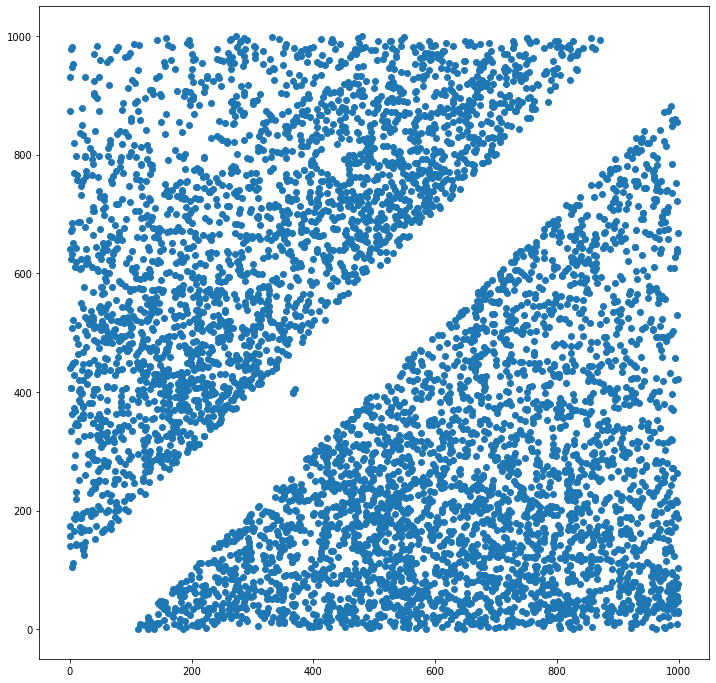

In [15]:
#df.plot.scatter(x='x', y='y');

plt.figure(figsize=(12,12))
plt.scatter(df['x'], df['y'])

In [76]:
kmeans = cluster.KMeans(n_clusters=num_clusters)
kmeans.fit(df)

centroids = kmeans.cluster_centers_
print(centroids)

[[847.57766944 127.31479747]
 [200.90497395 536.45725556]
 [626.47322913 894.33668448]
 [112.89837211 336.35746618]
 [744.61304895 408.75933177]
 [310.68356253  86.62903407]
 [883.08382057 645.01768205]
 [450.24219265 728.50207852]
 [548.09977731 177.16123519]
 [187.90013393 838.26143659]]


In [77]:
# create a pandas data frame with columns
centroids_df = pd.DataFrame(centroids, columns=['x', 'y'])
print(centroids_df)

            x           y
0  847.577669  127.314797
1  200.904974  536.457256
2  626.473229  894.336684
3  112.898372  336.357466
4  744.613049  408.759332
5  310.683563   86.629034
6  883.083821  645.017682
7  450.242193  728.502079
8  548.099777  177.161235
9  187.900134  838.261437


In [78]:
#y_km = kmeans.fit_predict(df)
df1 = df.copy()

df_pred = kmeans.predict(df1)
df1['depot'] = np.asarray(df_pred)
df1[:10]

,x,y,depot
0,622.771572,164.857623,8
1,416.357298,630.193634,7
2,292.735020,567.333231,1
3,737.211288,166.225676,0
4,540.475375,682.912298,7
5,535.469492,318.439661,8
6,640.380050,870.833221,2
7,235.772075,359.048203,3
8,481.896884,661.491838,7
9,730.032789,312.177817,4


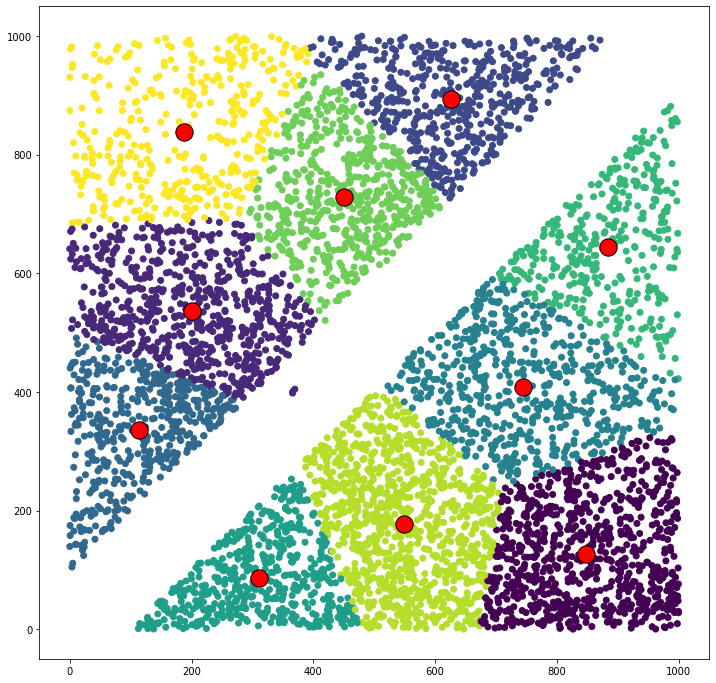

In [108]:
categories = np.unique(df1['depot'])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))

#depot_colors = {0:'red', 1:'blue', 2:'green'}
plt.figure(figsize=(12,12))
plt.scatter(df1['x'], df1['y'], c=df1['depot'].apply(lambda x: colordict[x]))

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=300, marker='o',
    c='red', edgecolor='black',
    label='centroids'
)

In [92]:
# Agglomerative hierarchical clustering

from sklearn.cluster import AgglomerativeClustering

ahc_cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
ahc_cluster.fit_predict(df)

array([3, 0, 0, ..., 2, 7, 6], dtype=int64)

In [93]:
df2 = df.copy()

df2['depot'] = np.asarray(ahc_cluster.labels_)
df2[:10]

,x,y,depot
0,622.771572,164.857623,3
1,416.357298,630.193634,0
2,292.735020,567.333231,0
3,737.211288,166.225676,3
4,540.475375,682.912298,4
5,535.469492,318.439661,6
6,640.380050,870.833221,4
7,235.772075,359.048203,5
8,481.896884,661.491838,0
9,730.032789,312.177817,6


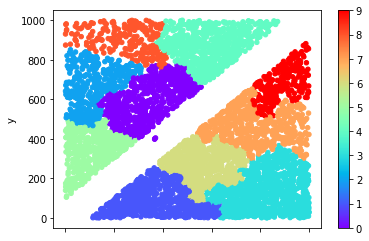

In [110]:
# the easier way...
df2.plot.scatter(x='x', y='y', c=ahc_cluster.labels_, cmap='rainbow')

In [ ]:
# cluster plots are similar but not the same
# also the depot labels are in a completely different order